In [489]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [490]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer

In [491]:
df = pd.read_csv("Levels_Fyi_Salary_Data.csv")

In [492]:
pd.set_option('display.max_columns', df.shape[1])
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [493]:
# store original dataframe
df_orig = df[:]

In [494]:
df.head(2)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.50,1.50,NaN,107000.00,20000.00,10000.00,NaN,NaN,7392,807.00,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.00,3.00,NaN,0.00,0.00,0.00,NaN,NaN,7419,807.00,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [495]:
# convert 'timestamp' to_datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%Y %H:%M:%S')
# df.dtypes

In [496]:
df['year'] = df['timestamp'].dt.year
df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,...,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,year
0,2017-06-07 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.50,1.50,NaN,107000.00,20000.00,10000.00,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2017
1,2017-06-10 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.00,3.00,NaN,0.00,0.00,0.00,NaN,NaN,...,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2017
2,2017-06-11 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.00,0.00,NaN,155000.00,0.00,0.00,NaN,NaN,...,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2017
3,2017-06-17 00:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.00,5.00,NaN,157000.00,180000.00,35000.00,NaN,NaN,...,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2017
4,2017-06-20 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.00,3.00,NaN,0.00,0.00,0.00,NaN,NaN,...,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2018-09-09 11:52:32,Google,T4,Software Engineer,327000,"Seattle, WA",10.00,1.00,Distributed Systems (Back-End),155000.00,150000.00,22000.00,NaN,NaN,...,1973,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2018
62638,2018-09-13 08:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.00,2.00,Full Stack,146900.00,73200.00,16000.00,NaN,NaN,...,2037,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2018
62639,2018-09-13 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.00,12.00,Full Stack,157000.00,25000.00,20000.00,NaN,NaN,...,2044,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2018
62640,2018-09-16 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.00,4.00,iOS,194688.00,57000.00,29000.00,NaN,NaN,...,2097,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2018


In [497]:
# rename and rearange columns (personal preference)
rename_col = {       
   'totalyearlycompensation' : 'total_yearly_compensation',
   'yearsofexperience' : 'years_of_experience',
   'yearsatcompany' : 'years_at_company',
   'basesalary' : 'base_salary',
   'stockgrantvalue' : 'stock_grant_value',
   'otherdetails' : 'other_details',
   'cityid' : 'city_id',
   'dmaid' : 'dma_id',
   'rowNumber' : 'row_number',
}
df=df.rename(columns=rename_col)
df = df[['timestamp','year','company','level','title','location','years_of_experience','years_at_company','tag','gender','other_details','city_id','dma_id','row_number','Masters_Degree','Bachelors_Degree','Doctorate_Degree','Highschool','Some_College','Race_Asian','Race_White','Race_Two_Or_More','Race_Black','Race_Hispanic','Race','Education','stock_grant_value','bonus','base_salary','total_yearly_compensation',]]


In [498]:
# cheking for nulls
for c in df.columns:
    if df[c].isnull().sum() != 0:
        print(f"{df[c].isnull().sum()} nulls in column {c}")
# df.isnull().sum()

5 nulls in column company
123 nulls in column level
870 nulls in column tag
19540 nulls in column gender
22508 nulls in column other_details
2 nulls in column dma_id
40215 nulls in column Race
32272 nulls in column Education


In [499]:
# get all columns w/all nans, if exists
nan_cols = [i for i in df.columns if df[i].isnull().all()]
nan_cols

[]

In [500]:
# get all rows w/all nans, if exists
df[df.isna().all(axis=1)]

,timestamp,year,company,level,title,location,years_of_experience,years_at_company,tag,gender,other_details,city_id,dma_id,row_number,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,stock_grant_value,bonus,base_salary,total_yearly_compensation


In [501]:
# checking for duplicate 
df.duplicated().sum()

0

In [502]:
# # print nr of unique values per column
# for c in df.columns:
#     print(c, df[c].nunique())

In [503]:
def get_heat_map_corr(corr_df, figsize=(10, 9), remove_cols=[], corr_method='pearson', title=None, mirrored=False):

    df_temp = corr_df
    for i in remove_cols:
        try:
            df_temp = df_temp.drop(i,axis=1)
        except:
            print(f'column {i} not found')
    
    for c in df_temp.columns:
        if df_temp[c].dtype == 'object':
            df_temp = df_temp.drop(c,axis=1)
            print(f'skipping columns [{c}] of object type')

    corr = df_temp.corr(method=corr_method)

    f, ax = plt.subplots(figsize=figsize)

    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    if title != None:
        plt.title(title)

    if mirrored == False:
        sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
    else:
        sns.heatmap(corr, annot=True, cmap=cmap)

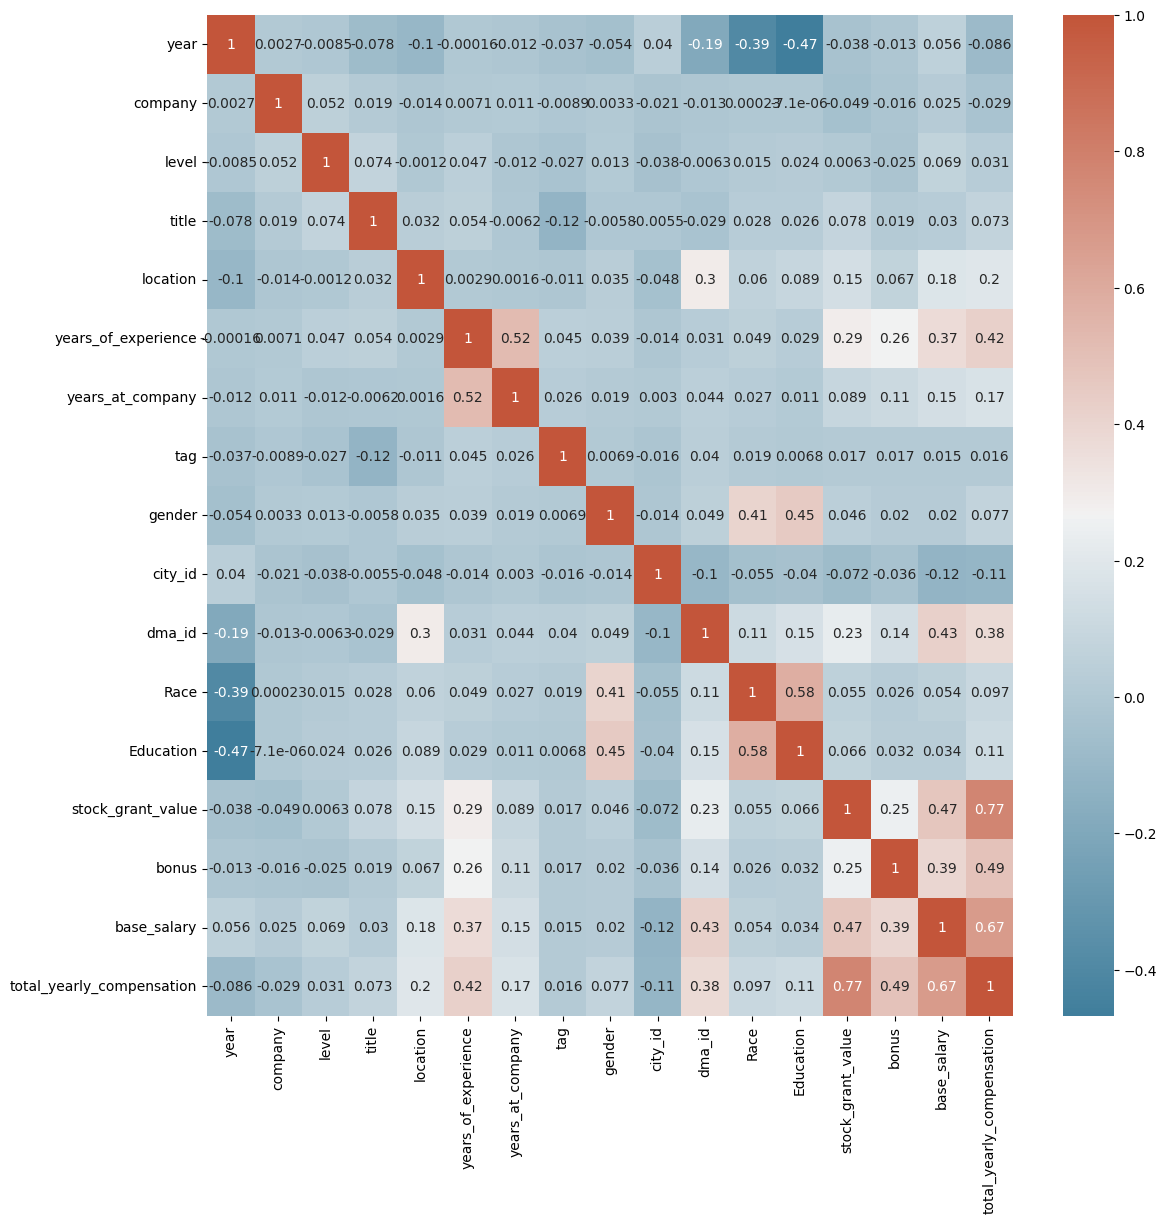

In [504]:
# heat map 
labeled_df = df[:]
label = LabelEncoder()

# encode all 'object' columns
cols_to_encode = [i for i in df.columns if df[i].dtype == 'object']
cols_to_encode

for c in cols_to_encode:
    label.fit(labeled_df[c].drop_duplicates())
    labeled_df[c] = label.transform(labeled_df[c])

labeled_df.head(1)


rm_cols = [
    'other_details','row_number','timestamp','Masters_Degree','Bachelors_Degree','Doctorate_Degree','Highschool','Some_College','Race_Asian','Race_White','Race_Two_Or_More','Race_Black','Race_Hispanic',
    ]
get_heat_map_corr(labeled_df, remove_cols=rm_cols,figsize=(13,13), mirrored=True)

In [505]:
# replace nans with 'unk' for string columns and mean() for numeric col
fill_na = {
    'company' : 'unk',
    'level' : 'unk',
    'tag' : 'unk',
    'gender' : 'unk',
    'other_details' : 'unk',
    'dma_id' : df['dma_id'].mean(),
    'Race' : 'unk',
    'Education' : 'unk',
}

for k,v in fill_na.items():
    # print(df[k].fillna(k,inplace=True))
    # print(k, v)
    df[k].fillna(v,inplace=True)

# c='dma_id'
# print(f"na sum {df[c].isna().sum()} \n")
# print(df[c].value_counts())
# print(df[c].mean())

# 5 nulls in column company
# 123 nulls in column level
# 870 nulls in column tag
# 19540 nulls in column gender
# 22508 nulls in column other_details
# 2 nulls in column dma_id
# 40215 nulls in column Race
# 32272 nulls in column Education



In [506]:
df['dma_id'].value_counts()
df['dma_id'].dtype

dtype('float64')

In [507]:
# # looking into 'dma_id', values mostly float but dtype == 'O', nevermind I filled na wrong value ))
# types = []
# for i in df['dma_id']:
#     # print(i, type(i), type(i) == 'float')
#     # print(isinstance(i, (int, float)))
#     if isinstance(i, (int, float)) == False:
#         types.append(i)

# for i in set(types):
#     print(i)
#     df['dma_id'] = df['dma_id'].replace(i, "unk")

In [508]:
# heat map 
label = LabelEncoder()

# encode all 'object' columns
# cols_to_encode = [i for i in df.columns if df[i].dtype == 'object']
cols_to_encode = [
    'company',
    'level',
    'title',
    'location',
    'tag',
    'gender',
    'other_details',
    'Race',
    'Education',
]

for c in cols_to_encode:
    # print(c)
    label.fit(df[c].drop_duplicates())
    df[c] = label.transform(df[c])

df.head()

,timestamp,year,company,level,title,location,years_of_experience,years_at_company,tag,gender,other_details,city_id,dma_id,row_number,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,stock_grant_value,bonus,base_salary,total_yearly_compensation
0,2017-06-07 11:33:27,2017,920,1091,8,767,1.50,1.50,3051,4,12813,7392,807.00,1,...,0,0,0,0,0,0,0,0,5,5,20000.00,10000.00,107000.00,127000
1,2017-06-10 17:11:29,2017,1458,1795,11,822,5.00,3.00,3051,4,12813,7419,807.00,2,...,0,0,0,0,0,0,0,0,5,5,0.00,0.00,0.00,100000
2,2017-06-11 14:53:57,2017,64,1175,8,858,8.00,0.00,3051,4,12813,11527,819.00,3,...,0,0,0,0,0,0,0,0,5,5,0.00,0.00,155000.00,310000
3,2017-06-17 00:23:14,2017,95,1294,12,908,7.00,5.00,3051,4,12813,7472,807.00,7,...,0,0,0,0,0,0,0,0,5,5,180000.00,35000.00,157000.00,372000
4,2017-06-20 10:58:51,2017,818,142,11,609,5.00,3.00,3051,4,12813,7322,807.00,9,...,0,0,0,0,0,0,0,0,5,5,0.00,0.00,0.00,157000


In [509]:
df.dtypes

timestamp                    datetime64[ns]
year                                  int32
company                               int32
level                                 int32
title                                 int32
location                              int32
years_of_experience                 float64
years_at_company                    float64
tag                                   int32
gender                                int32
other_details                         int32
city_id                               int64
dma_id                              float64
row_number                            int64
Masters_Degree                        int64
Bachelors_Degree                      int64
Doctorate_Degree                      int64
Highschool                            int64
Some_College                          int64
Race_Asian                            int64
Race_White                            int64
Race_Two_Or_More                      int64
Race_Black                      

In [510]:
def get_correlation(df, target_col, cols, sort=True):
    corr_dict = {}
    for i in cols:
        correlation = target_col.corr(df[i])
        corr_dict[i] = correlation

    if sort:
        corr_dict = dict(sorted(corr_dict.items(), key=lambda x: x[1], reverse=True))
    return corr_dict

In [511]:
# get sorted correlation columns to target col
cols = [i for i in df.columns]
cols.remove('timestamp')
cols.remove('total_yearly_compensation')
df
corr_dir = get_correlation(df,df['total_yearly_compensation'], cols)
corr_dir

{'stock_grant_value': 0.7707558023200468,
 'base_salary': 0.6728647007927668,
 'bonus': 0.48945372510607593,
 'years_of_experience': 0.4228791379682701,
 'dma_id': 0.37633960908198205,
 'location': 0.19656852722005402,
 'years_at_company': 0.16580220772142953,
 'Education': 0.11405016237745146,
 'Race': 0.09723353624399521,
 'Doctorate_Degree': 0.09717911358987212,
 'gender': 0.07679334989371757,
 'title': 0.07324359734998802,
 'other_details': 0.04942981648672307,
 'level': 0.030671331807024436,
 'Masters_Degree': 0.018319716268971567,
 'tag': 0.015511339922038169,
 'Some_College': -0.003379630401364154,
 'Race_Two_Or_More': -0.009622622236016115,
 'Highschool': -0.014830964931807472,
 'Race_Hispanic': -0.026144721866625278,
 'Race_Black': -0.026741264068291845,
 'Race_White': -0.02780248917286327,
 'company': -0.029353221524934355,
 'Race_Asian': -0.08007181791801464,
 'year': -0.08562346762303057,
 'row_number': -0.09262203762000949,
 'city_id': -0.11020422833628184,
 'Bachelors_Deg

In [512]:
# sorted correlation of 'total_yearly_compensation', excluded all the salary related columns
cols = [i for i in df.columns]
rm_cols = [
    'bonus',
    'total_yearly_compensation',
    'stock_grant_value',
    'base_salary',
    'timestamp',
]
cols = [r for r in cols if r not in rm_cols]

corr_dir = get_correlation(df,df['total_yearly_compensation'], cols)
corr_dir
# df

{'years_of_experience': 0.4228791379682701,
 'dma_id': 0.37633960908198205,
 'location': 0.19656852722005402,
 'years_at_company': 0.16580220772142953,
 'Education': 0.11405016237745146,
 'Race': 0.09723353624399521,
 'Doctorate_Degree': 0.09717911358987212,
 'gender': 0.07679334989371757,
 'title': 0.07324359734998802,
 'other_details': 0.04942981648672307,
 'level': 0.030671331807024436,
 'Masters_Degree': 0.018319716268971567,
 'tag': 0.015511339922038169,
 'Some_College': -0.003379630401364154,
 'Race_Two_Or_More': -0.009622622236016115,
 'Highschool': -0.014830964931807472,
 'Race_Hispanic': -0.026144721866625278,
 'Race_Black': -0.026741264068291845,
 'Race_White': -0.02780248917286327,
 'company': -0.029353221524934355,
 'Race_Asian': -0.08007181791801464,
 'year': -0.08562346762303057,
 'row_number': -0.09262203762000949,
 'city_id': -0.11020422833628184,
 'Bachelors_Degree': -0.13986633693732867}

In [513]:
# sorted correlation of 'bonus', excluded all the salary related columns
cols = [i for i in df.columns]
rm_cols = [
    'bonus',
    'total_yearly_compensation',
    'stock_grant_value',
    'base_salary',
    'timestamp',
]
cols = [r for r in cols if r not in rm_cols]

corr_dir = get_correlation(df,df['bonus'], cols)
corr_dir
# df

{'years_of_experience': 0.2610514812794633,
 'dma_id': 0.14350500578695552,
 'years_at_company': 0.10812235486112219,
 'Doctorate_Degree': 0.07184381512182492,
 'location': 0.06680147257152017,
 'Education': 0.03193006235967369,
 'Masters_Degree': 0.031537603505810426,
 'Race': 0.026478156145455883,
 'gender': 0.019931804376479966,
 'title': 0.01874019130019586,
 'tag': 0.016990426396797386,
 'Race_Two_Or_More': 0.0017733086284640114,
 'Some_College': -0.0018726964513551324,
 'Race_Black': -0.0040261832341926,
 'Highschool': -0.006915828419945071,
 'Race_Hispanic': -0.006983487312522076,
 'Race_White': -0.00779778871876596,
 'year': -0.012758141971520831,
 'row_number': -0.01475335053657983,
 'other_details': -0.015433353672857511,
 'company': -0.01647083322110613,
 'Race_Asian': -0.022997274357129335,
 'level': -0.02538427992881537,
 'city_id': -0.036118719140196674,
 'Bachelors_Degree': -0.06288079801342321}

In [522]:
year_group = df.groupby('year')

Text(0.5, 1.0, 'mean total_yearly_compensation by year')

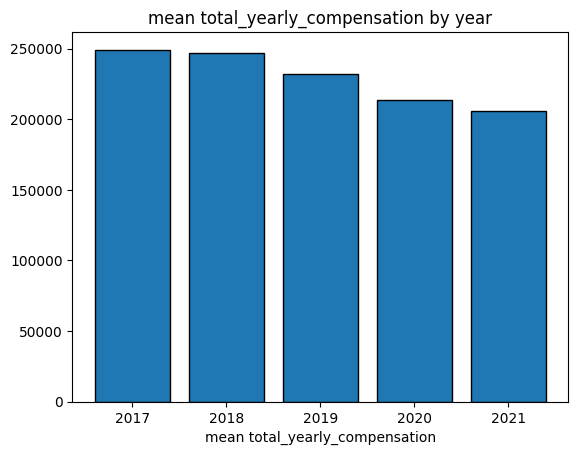

In [548]:
salary_by_year = [year_group.get_group(y)['total_yearly_compensation'].mean() for y in df['year'].value_counts().index]
salary_by_year

# plt.scatter(df['year'].value_counts(), salary_by_year)
plt.bar(df['year'].value_counts().index, salary_by_year, edgecolor='black')
plt.xlabel('year')
plt.xlabel('mean total_yearly_compensation')
plt.title('mean total_yearly_compensation by year')

Text(0.5, 1.0, 'mean bonus by year')

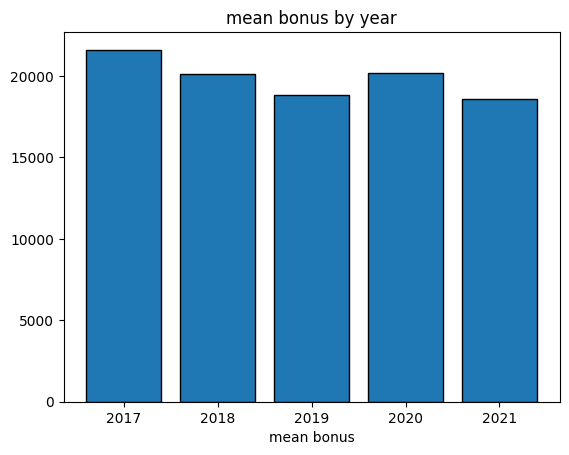

In [544]:
bonus_by_year = [year_group.get_group(y)['bonus'].mean() for y in df['year'].value_counts().index]
plt.bar(df['year'].value_counts().index, bonus_by_year, edgecolor='black')
plt.xlabel('year')
plt.xlabel('mean bonus')
plt.title('mean bonus by year')

Text(0.5, 1.0, 'mean years_at_company by year')

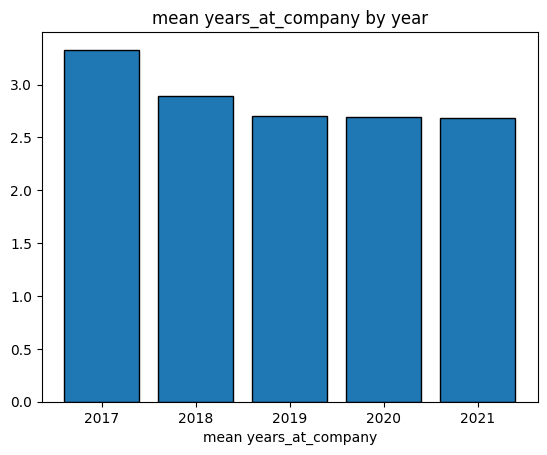

In [549]:
year_at_comp_by_year = [year_group.get_group(y)['years_at_company'].mean() for y in df['year'].value_counts().index]
year_at_comp_by_year

plt.bar(df['year'].value_counts().index, year_at_comp_by_year, edgecolor='black')
plt.xlabel('year')
plt.xlabel('mean years_at_company')
plt.title('mean years_at_company by year')

In [560]:
X = df.drop(['total_yearly_compensation', 'timestamp'],axis=1)
# X
y = df.total_yearly_compensation
# y

In [562]:
X.dtypes

year                     int32
company                  int32
level                    int32
title                    int32
location                 int32
years_of_experience    float64
years_at_company       float64
tag                      int32
gender                   int32
other_details            int32
city_id                  int64
dma_id                 float64
row_number               int64
Masters_Degree           int64
Bachelors_Degree         int64
Doctorate_Degree         int64
Highschool               int64
Some_College             int64
Race_Asian               int64
Race_White               int64
Race_Two_Or_More         int64
Race_Black               int64
Race_Hispanic            int64
Race                     int32
Education                int32
stock_grant_value      float64
bonus                  float64
base_salary            float64
dtype: object

In [561]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.4)

lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [566]:
lin_model.score(X_test,y_test)

0.8113784171528304

In [567]:
# get sorted coef_ 
data = {}
for indx, col_name in enumerate(X_train):
    # print(col_name, lin_model.coef_[indx])
    # print(col_name, indx, lin_model.coef_[indx])
    data[col_name] = lin_model.coef_[indx]
data = dict(sorted(data.items(), key=lambda x: x[1],reverse=True))
data

{'Doctorate_Degree': 13618.371874504051,
 'Race_Asian': 8418.241915878423,
 'Race_Two_Or_More': 7641.816737869441,
 'Race_Black': 7386.004025748889,
 'Race_White': 6266.009914876672,
 'gender': 3496.3321622561625,
 'Race_Hispanic': 3304.8087221587775,
 'years_of_experience': 2888.8795680854955,
 'Race': 669.8176804018339,
 'title': 420.0590009121298,
 'Masters_Degree': 155.98672777763284,
 'dma_id': 46.540257204105195,
 'location': 10.589832798400622,
 'level': 1.6760734403279116,
 'bonus': 1.0824576527461822,
 'other_details': 1.0146758585975142,
 'stock_grant_value': 0.905873719543294,
 'base_salary': 0.5477588965139661,
 'row_number': -0.19118759310303088,
 'city_id': -0.409119012715172,
 'company': -1.7372250648056324,
 'tag': -1.8842069759261382,
 'years_at_company': -380.89497508590966,
 'Education': -927.8060587787106,
 'Highschool': -3145.7531342873885,
 'Some_College': -3303.2722103358415,
 'year': -3621.256159006547,
 'Bachelors_Degree': -4034.9480369662588}